## Extended Data Figure 4

![title](../assets/EDFig4.png)

In [16]:
%load_ext autoreload
%autoreload 2

import sys
import logging
from pathlib import Path
from itertools import combinations

logging.getLogger("matplotlib.font_manager").disabled = True

import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from common import *

sys.path.append('./prepare_data')

DATA_PATH = Path(
    "../data"
)
EXPORT_PATH = Path(
    "../results/EDFigure4"
)
EXPORT_PATH.mkdir(exist_ok=True, parents=True)

FIGSIZE = {'width': 1.2, 'length': 0.9}

COLOR_ANGLES = {
    'Angle_head_roll': COLORS['green'],
    'Angle_head_pitch': COLORS['black'],
    'Angle_antenna_pitch_R': COLORS['skyblue'],
    'Angle_antenna_pitch_L': COLORS['orange'],
}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Panel A: distribution of head joint angles during bilateral grooming, used for head pitch silencing

/var/folders/tq/lmjf3_8j2pgc58qrzj3pl2x00000gp/T/ipykernel_97852/2085373169.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/tq/lmjf3_8j2pgc58qrzj3pl2x00000gp/T/ipykernel_97852/2085373169.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/tq/lmjf3_8j2pgc58qrzj3pl2x00000gp/T/ipykernel_97852/2085373169.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/tq/lmjf3_8j2pgc58qrzj3pl2x00000gp/T/ipykernel_97852/2085373169.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is depr

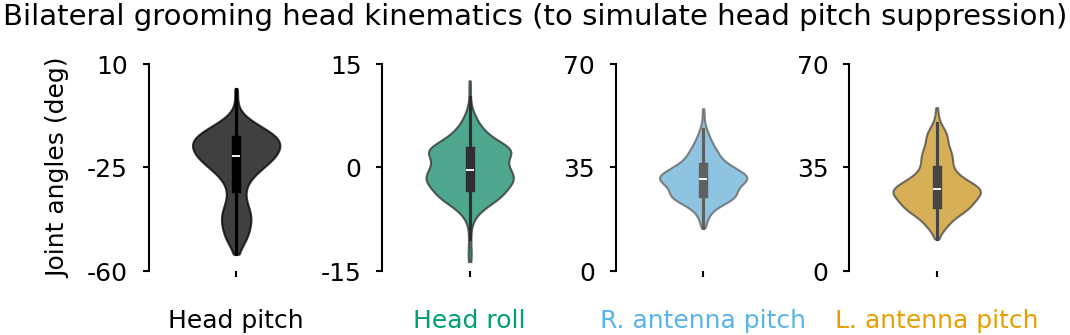

In [17]:
head_pitch_dict = load_data(DATA_PATH / "EDFig4_panelA.pkl")

with plt.style.context("./config.mplstyle"):
    fig, axs = plt.subplots(
        1, 4, figsize=(FIGSIZE["width"] * 2.7, FIGSIZE["length"] * 1.1), dpi=300
    )
    axs = axs.flatten()

    sns.violinplot(
        data=head_pitch_dict['dist_head_pitch'],
        ax=axs[0],
        # showfliers=False,
        palette=[COLOR_ANGLES["Angle_head_pitch"]],
        width=0.5,
        linewidth=0.5,
        alpha=0.75,
        cut=0,
    )
    axs[0].set_xlabel("Head pitch", color=COLOR_ANGLES["Angle_head_pitch"])

    sns.violinplot(
        data=head_pitch_dict['dist_head_roll'],
        ax=axs[1],
        # showfliers=False,
        palette=[COLOR_ANGLES["Angle_head_roll"]],
        width=0.5,
        linewidth=0.5,
        alpha=0.75,
        cut=0,
    )
    axs[1].set_xlabel("Head roll", color=COLOR_ANGLES["Angle_head_roll"])

    sns.violinplot(
        data=head_pitch_dict['dist_right_antenna_pitch'],
        ax=axs[2],
        # showfliers=False,
        palette=[COLOR_ANGLES["Angle_antenna_pitch_R"]],
        width=0.5,
        linewidth=0.5,
        alpha=0.75,
        cut=0,
    )
    axs[2].set_xlabel("R. antenna pitch", color=COLOR_ANGLES["Angle_antenna_pitch_R"])

    sns.violinplot(
        data=head_pitch_dict['dist_left_antenna_pitch'],
        ax=axs[3],
        # showfliers=False,
        palette=[COLOR_ANGLES["Angle_antenna_pitch_L"]],
        width=0.5,
        linewidth=0.5,
        alpha=0.75,
        cut=0,
    )
    axs[3].set_xlabel("L. antenna pitch", color=COLOR_ANGLES["Angle_antenna_pitch_L"])

    axs[0].set_ylabel("Joint angles (deg)")

    for i in [2, 3]:
        axs[i].set_ylim(0, -70)
        axs[i].set_yticks(ticks=np.arange(0, -71, -35), labels=np.arange(0, 71, 35))

    # align labels
    fig.align_xlabels(axs[:])
    fig.align_ylabels(axs[:])

    for i in range(4):
        axs[i].spines["bottom"].set_visible(False)

    # reverse y axis
    axs[0].invert_yaxis()
    axs[0].set_yticks(ticks=(-10, 25, 60), labels=(10, -25, -60))
    axs[1].set_ylim(-15, 15)
    axs[1].set_yticks(ticks=(-15, 0, 15), labels=(-15, 0, 15))
    plt.suptitle('Bilateral grooming head kinematics (to simulate head pitch suppression)', y=1.1)

    plt.tight_layout(pad=-0.1)
    fig.savefig(EXPORT_PATH / "EDFig4_panelA.png")
    plt.show()

## Panel B: Force quantification

The contact array has the following indexing:
```python
    # Contacts
    CONTACT_SIZE = 12
    CONTACT_REACTION_X = 0
    CONTACT_REACTION_Y = 1
    CONTACT_REACTION_Z = 2
    CONTACT_FRICTION_X = 3
    CONTACT_FRICTION_Y = 4
    CONTACT_FRICTION_Z = 5
    CONTACT_TOTAL_X = 6
    CONTACT_TOTAL_Y = 7
    CONTACT_TOTAL_Z = 8
    CONTACT_POSITION_X = 9
    CONTACT_POSITION_Y = 10
    CONTACT_POSITION_Z = 11

```

In [18]:
# Load kinematic replay data
sim_data_gain100 = hdf5_to_dict(DATA_PATH / "EDFig4_head_pitch_gain100.hdf5")
sim_data_gain0 = hdf5_to_dict(DATA_PATH / "EDFig4_head_pitch_gain0.hdf5")

# Units
UNIT_SCALE = 1e-6
UNIT = "N"

# Compute contact forces from contact array
collision_pairs = reduce_collision_pairs_ant(get_collision_pairs(sim_data_gain100))

contact_array_gain100 = sim_data_gain100["sensors"]["contacts"]["array"]
contact_array_gain0 = sim_data_gain0["sensors"]["contacts"]["array"]

contact_forces_gain100 = {
    'right_tibia_ant': get_contact_forces(
        contact_array_gain100, collision_pairs[("RAntenna", "RFTibia")], get_vector=True),
    'left_tibia_ant': get_contact_forces(
        contact_array_gain100, collision_pairs[("LAntenna", "LFTibia")], get_vector=True),
    'right_tarsus_ant': get_contact_forces(
        contact_array_gain100, collision_pairs[("RAntenna", "RFTarsus")], get_vector=True),
    'left_tarsus_ant': get_contact_forces(
        contact_array_gain100, collision_pairs[("LAntenna", "LFTarsus")], get_vector=True),
}

contact_forces_gain0 = {
    'right_tibia_ant': get_contact_forces(
        contact_array_gain0, collision_pairs[("RAntenna", "RFTibia")], get_vector=True),
    'left_tibia_ant': get_contact_forces(
        contact_array_gain0, collision_pairs[("LAntenna", "LFTibia")], get_vector=True),
    'right_tarsus_ant': get_contact_forces(
        contact_array_gain0, collision_pairs[("RAntenna", "RFTarsus")], get_vector=True),
    'left_tarsus_ant': get_contact_forces(
        contact_array_gain0, collision_pairs[("LAntenna", "LFTarsus")], get_vector=True),
}

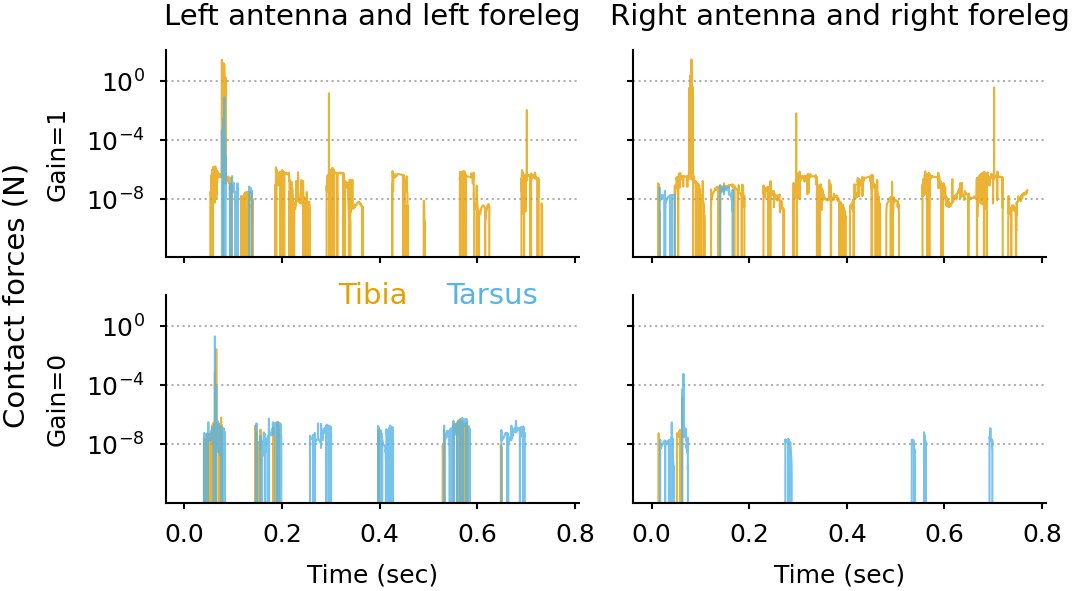

In [19]:
with plt.style.context("./config.mplstyle"):
    fig, axs = plt.subplots(
        2,
        2,
        figsize=(FIGSIZE["width"] * 3.0, FIGSIZE["length"] * 2.4),
        dpi=300,
        sharey=True,
        sharex=True,
    )
    axs = axs.flatten()
    for i, (key, value) in enumerate(contact_forces_gain100.items()):
        time = np.arange(0, value.shape[0] * 1e-4, 1e-4)
        if "left" in key:
            axs[0].plot(
                time,
                UNIT_SCALE * np.linalg.norm(value, axis=1),
                alpha=0.8
            )
        else:
            axs[1].plot(
                time,
                UNIT_SCALE * np.linalg.norm(value, axis=1),
                label=key.split("_")[1],
                alpha=0.8,
            )
    axs[0].set_title("Left antenna and left foreleg")
    axs[1].set_title("Right antenna and right foreleg")
    axs[0].set_ylabel("Gain=1")
    axs[2].set_ylabel("Gain=0")

    for i, (key, value) in enumerate(contact_forces_gain0.items()):
        time = np.arange(0, value.shape[0] * 1e-4, 1e-4)
        if "left" in key:
            axs[2].plot(
                time,
                UNIT_SCALE * np.linalg.norm(value, axis=1),
                alpha=0.8
            )
        else:
            axs[3].plot(
                time,
                UNIT_SCALE * np.linalg.norm(value, axis=1),
                label=key.split("_")[1],
                alpha=0.8,
            )

    axs[2].set_xlabel("Time (sec)")
    axs[3].set_xlabel("Time (sec)")

    for ax_ in axs:
        ax_.set_yscale("log")
        ax_.grid(axis="y", linestyle=":", linewidth=0.5)

    axs[0].yaxis.get_major_locator().set_params(numticks=4)

    fig.text(-0.01, 0.5, f"Contact forces ({UNIT})", va="center", rotation="vertical")

    fig.text(0.3, 0.5, "Tibia", color=COLORS["orange"], va="center")
    fig.text(0.4, 0.5, "Tarsus", color=COLORS["skyblue"], va="center")
    plt.tight_layout()
    fig.savefig(EXPORT_PATH / "EDFig4_contact_forces.png")
    plt.show()

# Panel C: Force quantification across gains

In [20]:
def compute_contact_forces(contact_array, collision_pair_idx, get_vector=False):
    """
    Get the contact forces for the given collision pair index
    """
    contact_forces = contact_array[:, collision_pair_idx, :]
    if get_vector:
        return np.sum(contact_forces, axis=1)
    else:
        return np.linalg.norm(np.sum(contact_forces, axis=1), axis=1)

In [21]:
contact_dict = load_data(DATA_PATH / "EDFig4_panelC.pkl")

meta_collision_list = []
columns = ["Fly", "Segment", "Gain", "Value"]

for fly_name, contact_array_dict in contact_dict.items():
    for i, gain in enumerate(np.arange(0, 1.4, 0.1)):
        folder_name = f"gain_{gain:.1f}"
        # Contact array
        contact_array = contact_array_dict[folder_name]
        # Ipsi tibia - antenna
        tibia_r = UNIT_SCALE * (
            compute_contact_forces(
                contact_array,
                collision_pairs[("RAntenna", "RFTibia")],
                get_vector=False,
            )
        )
        tibia_l = UNIT_SCALE * (
            compute_contact_forces(
                contact_array,
                collision_pairs[("LAntenna", "LFTibia")],
                get_vector=False,
            )
        )
        # Ipsi tarsus - antenna
        tarsus_r = UNIT_SCALE * (
            compute_contact_forces(
                contact_array,
                collision_pairs[("RAntenna", "RFTarsus")],
                get_vector=False,
            )
        )
        tarsus_l = UNIT_SCALE * (
            compute_contact_forces(
                contact_array,
                collision_pairs[("LAntenna", "LFTarsus")],
                get_vector=False,
            )
        )

        # Median of non-zero force values
        meta_collision_list.extend(
            [
                [fly_name, "Tibia", gain, np.median(tibia_r[tibia_r > 0])],
                [fly_name, "Tibia", gain, np.median(tibia_l[tibia_l > 0])],
                [fly_name, "Tarsus", gain, np.median(tarsus_r[tarsus_r > 0])],
                [fly_name, "Tarsus", gain, np.median(tarsus_l[tarsus_l > 0])],
            ]
        )

meta_coll_df = pd.DataFrame(meta_collision_list, columns=columns)

/Users/ozdil/anaconda3/envs/ntw_model/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/ozdil/anaconda3/envs/ntw_model/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


/var/folders/tq/lmjf3_8j2pgc58qrzj3pl2x00000gp/T/ipykernel_97852/1222752202.py:3: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for group_name, group in meta_coll_df.groupby(["Gain"]):
/var/folders/tq/lmjf3_8j2pgc58qrzj3pl2x00000gp/T/ipykernel_97852/1222752202.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f"{x:.1f}" for x in np.arange(0, 1.4, 0.1)])


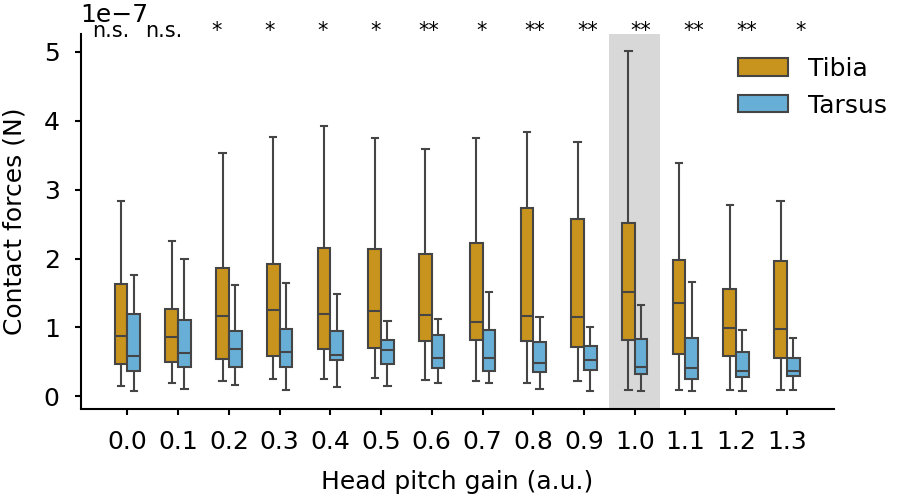

In [22]:
# Calculate p values
p_values = {}
for group_name, group in meta_coll_df.groupby(["Gain"]):

    tibia = group[group.Segment == "Tibia"].dropna().Value.to_list()
    tarsus = group[group.Segment == "Tarsus"].dropna().Value.to_list()

    p_val_mannu = scipy.stats.mannwhitneyu(
        tibia, tarsus, alternative="two-sided"
    ).pvalue

    if p_val_mannu < 1e-4:
        p_values[group_name] = "***"
    elif p_val_mannu < 1e-3:
        p_values[group_name] = "**"
    elif p_val_mannu < 5e-2:
        p_values[group_name] = "*"
    else:
        p_values[group_name] = "n.s."

with plt.style.context("./config.mplstyle"):
    fig, ax = plt.subplots(
        figsize=(FIGSIZE["width"] * 2.7, FIGSIZE["length"] * 1.8),
        dpi=300,
        sharey=False,
    )

    sns.boxplot(
        data=meta_coll_df,
        x="Gain",
        y="Value",
        hue="Segment",
        palette=["#E69F00", "#56B4E9"],
        showfliers=False,
        linewidth=0.5,
        # fill=True,
        width=0.5,
    )

    ax.set_xticklabels([f"{x:.1f}" for x in np.arange(0, 1.4, 0.1)])

    ax.set_xlabel("Head pitch gain (a.u.)")
    ax.set_ylabel(f"Contact forces ({UNIT})")

    ax.legend(bbox_to_anchor=(1.1, 1))

    # sxhspan between 0.95 and 1.05
    ax.axvspan(9.5, 10.5, color="gray", alpha=0.3, lw=0)

    # put p values at each column
    for gain, pval in p_values.items():
        ax.text(
            0.04 + gain / 1.42,
            1.01,
            f"{pval}",
            horizontalalignment="center",
            verticalalignment="center",
            transform=ax.transAxes,
            fontsize=5,
        )

    fig.savefig(EXPORT_PATH / "EDFig4_panelC.png")
    plt.show()

## Panel D: distribution of head joint angles during unilateral grooming, used for head roll and antennal pitch silencing

/var/folders/tq/lmjf3_8j2pgc58qrzj3pl2x00000gp/T/ipykernel_97852/44788194.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/tq/lmjf3_8j2pgc58qrzj3pl2x00000gp/T/ipykernel_97852/44788194.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/tq/lmjf3_8j2pgc58qrzj3pl2x00000gp/T/ipykernel_97852/44788194.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(
/var/folders/tq/lmjf3_8j2pgc58qrzj3pl2x00000gp/T/ipykernel_97852/44788194.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

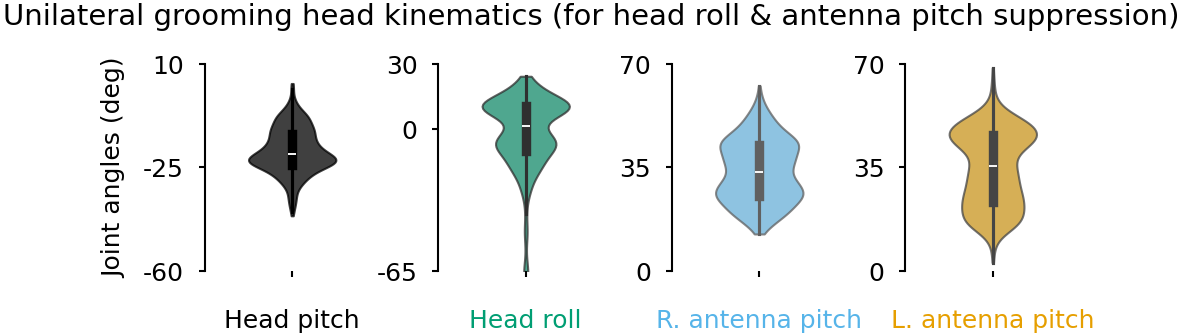

In [23]:
head_roll_dict = load_data(DATA_PATH / "EDFig4_panelD.pkl")

with plt.style.context("./config.mplstyle"):
    fig, axs = plt.subplots(
        1, 4, figsize=(FIGSIZE["width"] * 2.7, FIGSIZE["length"] * 1.1), dpi=300
    )
    axs = axs.flatten()

    sns.violinplot(
        data=head_roll_dict["dist_head_pitch"],
        ax=axs[0],
        palette=[COLOR_ANGLES["Angle_head_pitch"]],
        width=0.5,
        linewidth=0.5,
        alpha=0.75,
        cut=0
    )
    axs[0].set_xlabel("Head pitch", color=COLOR_ANGLES["Angle_head_pitch"])

    sns.violinplot(
        data=head_roll_dict["dist_head_roll"],
        ax=axs[1],
        palette=[COLOR_ANGLES["Angle_head_roll"]],
        width=0.5,
        linewidth=0.5,
        alpha=0.75,
        cut=0
    )
    axs[1].set_xlabel("Head roll", color=COLOR_ANGLES["Angle_head_roll"])

    sns.violinplot(
        data=head_roll_dict["dist_right_antenna_pitch"],
        ax=axs[2],
        palette=[COLOR_ANGLES["Angle_antenna_pitch_R"]],
        width=0.5,
        linewidth=0.5,
        alpha=0.75,
        cut=0
    )
    axs[2].set_xlabel("R. antenna pitch", color=COLOR_ANGLES["Angle_antenna_pitch_R"])

    sns.violinplot(
        data=head_roll_dict["dist_left_antenna_pitch"],
        ax=axs[3],
        # showfliers=False,
        palette=[COLOR_ANGLES["Angle_antenna_pitch_L"]],
        width=0.5,
        linewidth=0.5,
        alpha=0.75,
        cut=0,
    )
    axs[3].set_xlabel("L. antenna pitch", color=COLOR_ANGLES["Angle_antenna_pitch_L"])

    axs[0].set_ylabel("Joint angles (deg)")

    for i in [2, 3]:
        axs[i].set_ylim(0, -70)
        axs[i].set_yticks(ticks=np.arange(0, -71, -35), labels=np.arange(0, 71, 35))

    # align labels
    fig.align_xlabels(axs[:])
    fig.align_ylabels(axs[:])

    for i in range(4):
        axs[i].spines["bottom"].set_visible(False)

    # reverse y axis
    axs[0].invert_yaxis()
    axs[0].set_yticks(ticks=(-10, 25, 60), labels=(10, -25, -60))
    axs[1].set_ylim(-65, 30)
    axs[1].set_yticks(ticks=(-65, 0, 30), labels=(-65, 0, 30))

    plt.suptitle('Unilateral grooming head kinematics (for head roll & antenna pitch suppression)', y=1.1)
    plt.tight_layout(pad=-0.1)
    fig.savefig(EXPORT_PATH / "EDFig4_panelD.png")
    plt.show()